In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from functools import reduce

### Merging CSV files by county

In [5]:

# Merge on 'name_and_fips'

# casino_count.csv
# 'name_and_fips',
# 'casino_point_count'
# 'GEOID'

casino = pd.read_csv('~/HumanTrafficking/NIBRS_2/CSV_nibrs_2/casino_full_count.csv')

# HT_SOB_count.csv
# 'name_and_fips',
# 'SOB_point_count'
# 'GEOID'

sob = pd.read_csv('HT_SOB_count.csv')

# censusdata.csv
# includes both nibrs and census variables
# 'name_and_fips',
# 'GEOID'
# 'HT_incident_count'
# 'County_State'
# 'Below Poverty Level Rate'
# 'Population Density'
# 'Median Household Income'

census = pd.read_csv('censusdata.csv')

#highway_count.csv
# 'name_and_fips',
# 'GEOID',
#'highway_count'
highway = pd.read_csv('highway_count.csv')

#airport_counts.csv
# 'name_and_fips',
# 'GEOID'
#'medlarge_airport_count'

airport = pd.read_csv('airport_counts.csv')


#census2.csv
# 'GEOID'
# 'County_State'
# 'Below Poverty Level'
# 'Total Population'
# 'Median Household Income'
census2 = pd.read_csv('census2.csv')

In [3]:
#merging dataframes, calling on only specific columns
#census 3193
#merged_df 
merged_df = census[['GEOID', 'name_and_fips', 'ALAND', 'HT_incident_count']].merge(
    highway[['GEOID', 'highway_count']], on='GEOID', how='left')
#1400
merged_df = merged_df.merge(
    airport[['GEOID', 'medlarge_airport_count']], on='GEOID', how='left')
#444
merged_df = merged_df.merge(
    sob[['GEOID', 'SOB_point_count']], on='GEOID', how='left')

merged_df = merged_df.merge(
    casino[['GEOID', 'casino_point_count']], on='GEOID', how='left')
merged_df = merged_df.merge(
    census2[['GEOID', 'County_State', 'Below Poverty Level', 'Total Population','Median Household Income']], on='GEOID', how='left')
merged_df.head()

,GEOID,name_and_fips,ALAND,HT_incident_count,highway_count,medlarge_airport_count,SOB_point_count,casino_point_count,County_State,Below Poverty Level,Total Population,Median Household Income
0,21007,Ballard 21,639387454,NaN,NaN,NaN,NaN,NaN,"Ballard County, Kentucky",1085.0,7742.0,57111.0
1,21017,Bourbon 21,750439351,NaN,NaN,NaN,NaN,NaN,"Bourbon County, Kentucky",3015.0,20228.0,54580.0
2,21031,Butler 21,1103571974,NaN,NaN,NaN,NaN,NaN,"Butler County, Kentucky",2367.0,12365.0,47589.0
3,21065,Estill 21,655509930,NaN,NaN,NaN,NaN,NaN,"Estill County, Kentucky",3353.0,14138.0,39980.0
4,21069,Fleming 21,902727151,NaN,NaN,NaN,NaN,NaN,"Fleming County, Kentucky",3167.0,15111.0,46885.0


In [4]:
# Replace NaN with 0 in column 'A'
merged_df['medlarge_airport_count'] = merged_df['medlarge_airport_count'].fillna(0)
merged_df['highway_count'] = merged_df['highway_count'].fillna(0)
merged_df['HT_incident_count'] = merged_df['HT_incident_count'].fillna(0)
merged_df['casino_point_count'] = merged_df['casino_point_count'].fillna(0)
#calculate pov rate and population density
merged_df['Population Density'] = merged_df['Total Population']/merged_df['ALAND'] * 100
merged_df['Below Poverty Level Rate'] = merged_df['Below Poverty Level'] / merged_df['Total Population'] * 100
merged_df

,GEOID,name_and_fips,ALAND,HT_incident_count,highway_count,medlarge_airport_count,SOB_point_count,casino_point_count,County_State,Below Poverty Level,Total Population,Median Household Income,Population Density,Below Poverty Level Rate
0,21007,Ballard 21,639387454,0.0,0.0,0.0,NaN,0.0,"Ballard County, Kentucky",1085.0,7742.0,57111.0,0.001211,14.014467
1,21017,Bourbon 21,750439351,0.0,0.0,0.0,NaN,0.0,"Bourbon County, Kentucky",3015.0,20228.0,54580.0,0.002695,14.905082
2,21031,Butler 21,1103571974,0.0,0.0,0.0,NaN,0.0,"Butler County, Kentucky",2367.0,12365.0,47589.0,0.001120,19.142742
3,21065,Estill 21,655509930,0.0,0.0,0.0,NaN,0.0,"Estill County, Kentucky",3353.0,14138.0,39980.0,0.002157,23.716226
4,21069,Fleming 21,902727151,0.0,0.0,0.0,NaN,0.0,"Fleming County, Kentucky",3167.0,15111.0,46885.0,0.001674,20.958242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,31073,Gosper 31,1186616237,0.0,0.0,0.0,NaN,0.0,"Gosper County, Nebraska",120.0,1873.0,76583.0,0.000158,6.406834
3189,39075,Holmes 39,1094405866,0.0,0.0,0.0,NaN,0.0,"Holmes County, Ohio",3888.0,44273.0,72987.0,0.004045,8.781876
3190,48171,Gillespie 48,2740719114,0.0,2.0,0.0,NaN,0.0,"Gillespie County, Texas",2413.0,26953.0,70162.0,0.000983,8.952621
3191,55079,Milwaukee 55,625440563,32.0,24.0,1.0,NaN,0.0,"Milwaukee County, Wisconsin",162787.0,933063.0,59319.0,0.149185,17.446518


### Initial Exploratory Data Analysis

In [5]:
pca = merged_df[merged_df['SOB_point_count'].notna()]
pca

,GEOID,name_and_fips,ALAND,HT_incident_count,highway_count,medlarge_airport_count,SOB_point_count,casino_point_count,County_State,Below Poverty Level,Total Population,Median Household Income,Population Density,Below Poverty Level Rate
23,1089,Madison 01,2076091216,3.0,4.0,2.0,6.0,0.0,"Madison County, Alabama",40440.0,389781.0,78058.0,0.018775,10.375057
40,6037,Los Angeles 06,10510671776,5.0,65.0,8.0,97.0,16.0,"Los Angeles County, California",1343978.0,9936690.0,83411.0,0.094539,13.525409
59,12073,Leon 12,1727086019,2.0,4.0,1.0,2.0,0.0,"Leon County, Florida",53940.0,294128.0,61317.0,0.017030,18.338954
60,12095,Orange 12,2337566033,26.0,2.0,1.0,14.0,1.0,"Orange County, Florida",187454.0,1427403.0,72629.0,0.061064,13.132521
131,22033,East Baton Rouge 22,1179330896,2.0,17.0,1.0,1.0,3.0,"East Baton Rouge Parish, Louisiana",78833.0,454369.0,62083.0,0.038528,17.349995
133,22071,Orleans 22,438820361,0.0,6.0,1.0,12.0,5.0,"Orleans Parish, Louisiana",84133.0,380408.0,51116.0,0.086689,22.116517
194,48141,El Paso 48,2624139561,19.0,8.0,2.0,9.0,12.0,"El Paso County, Texas",165778.0,863832.0,55417.0,0.032919,19.191000
285,49035,Salt Lake 49,1921943668,18.0,13.0,2.0,1.0,0.0,"Salt Lake County, Utah",94306.0,1180643.0,90011.0,0.061430,7.987681
355,28157,Wilkinson 28,1756287147,0.0,0.0,0.0,1.0,0.0,"Wilkinson County, Mississippi",1601.0,8531.0,34928.0,0.000486,18.766850
430,32003,Clark 32,20439281456,159.0,10.0,5.0,84.0,283.0,"Clark County, Nevada",299459.0,2265926.0,69911.0,0.011086,13.215745


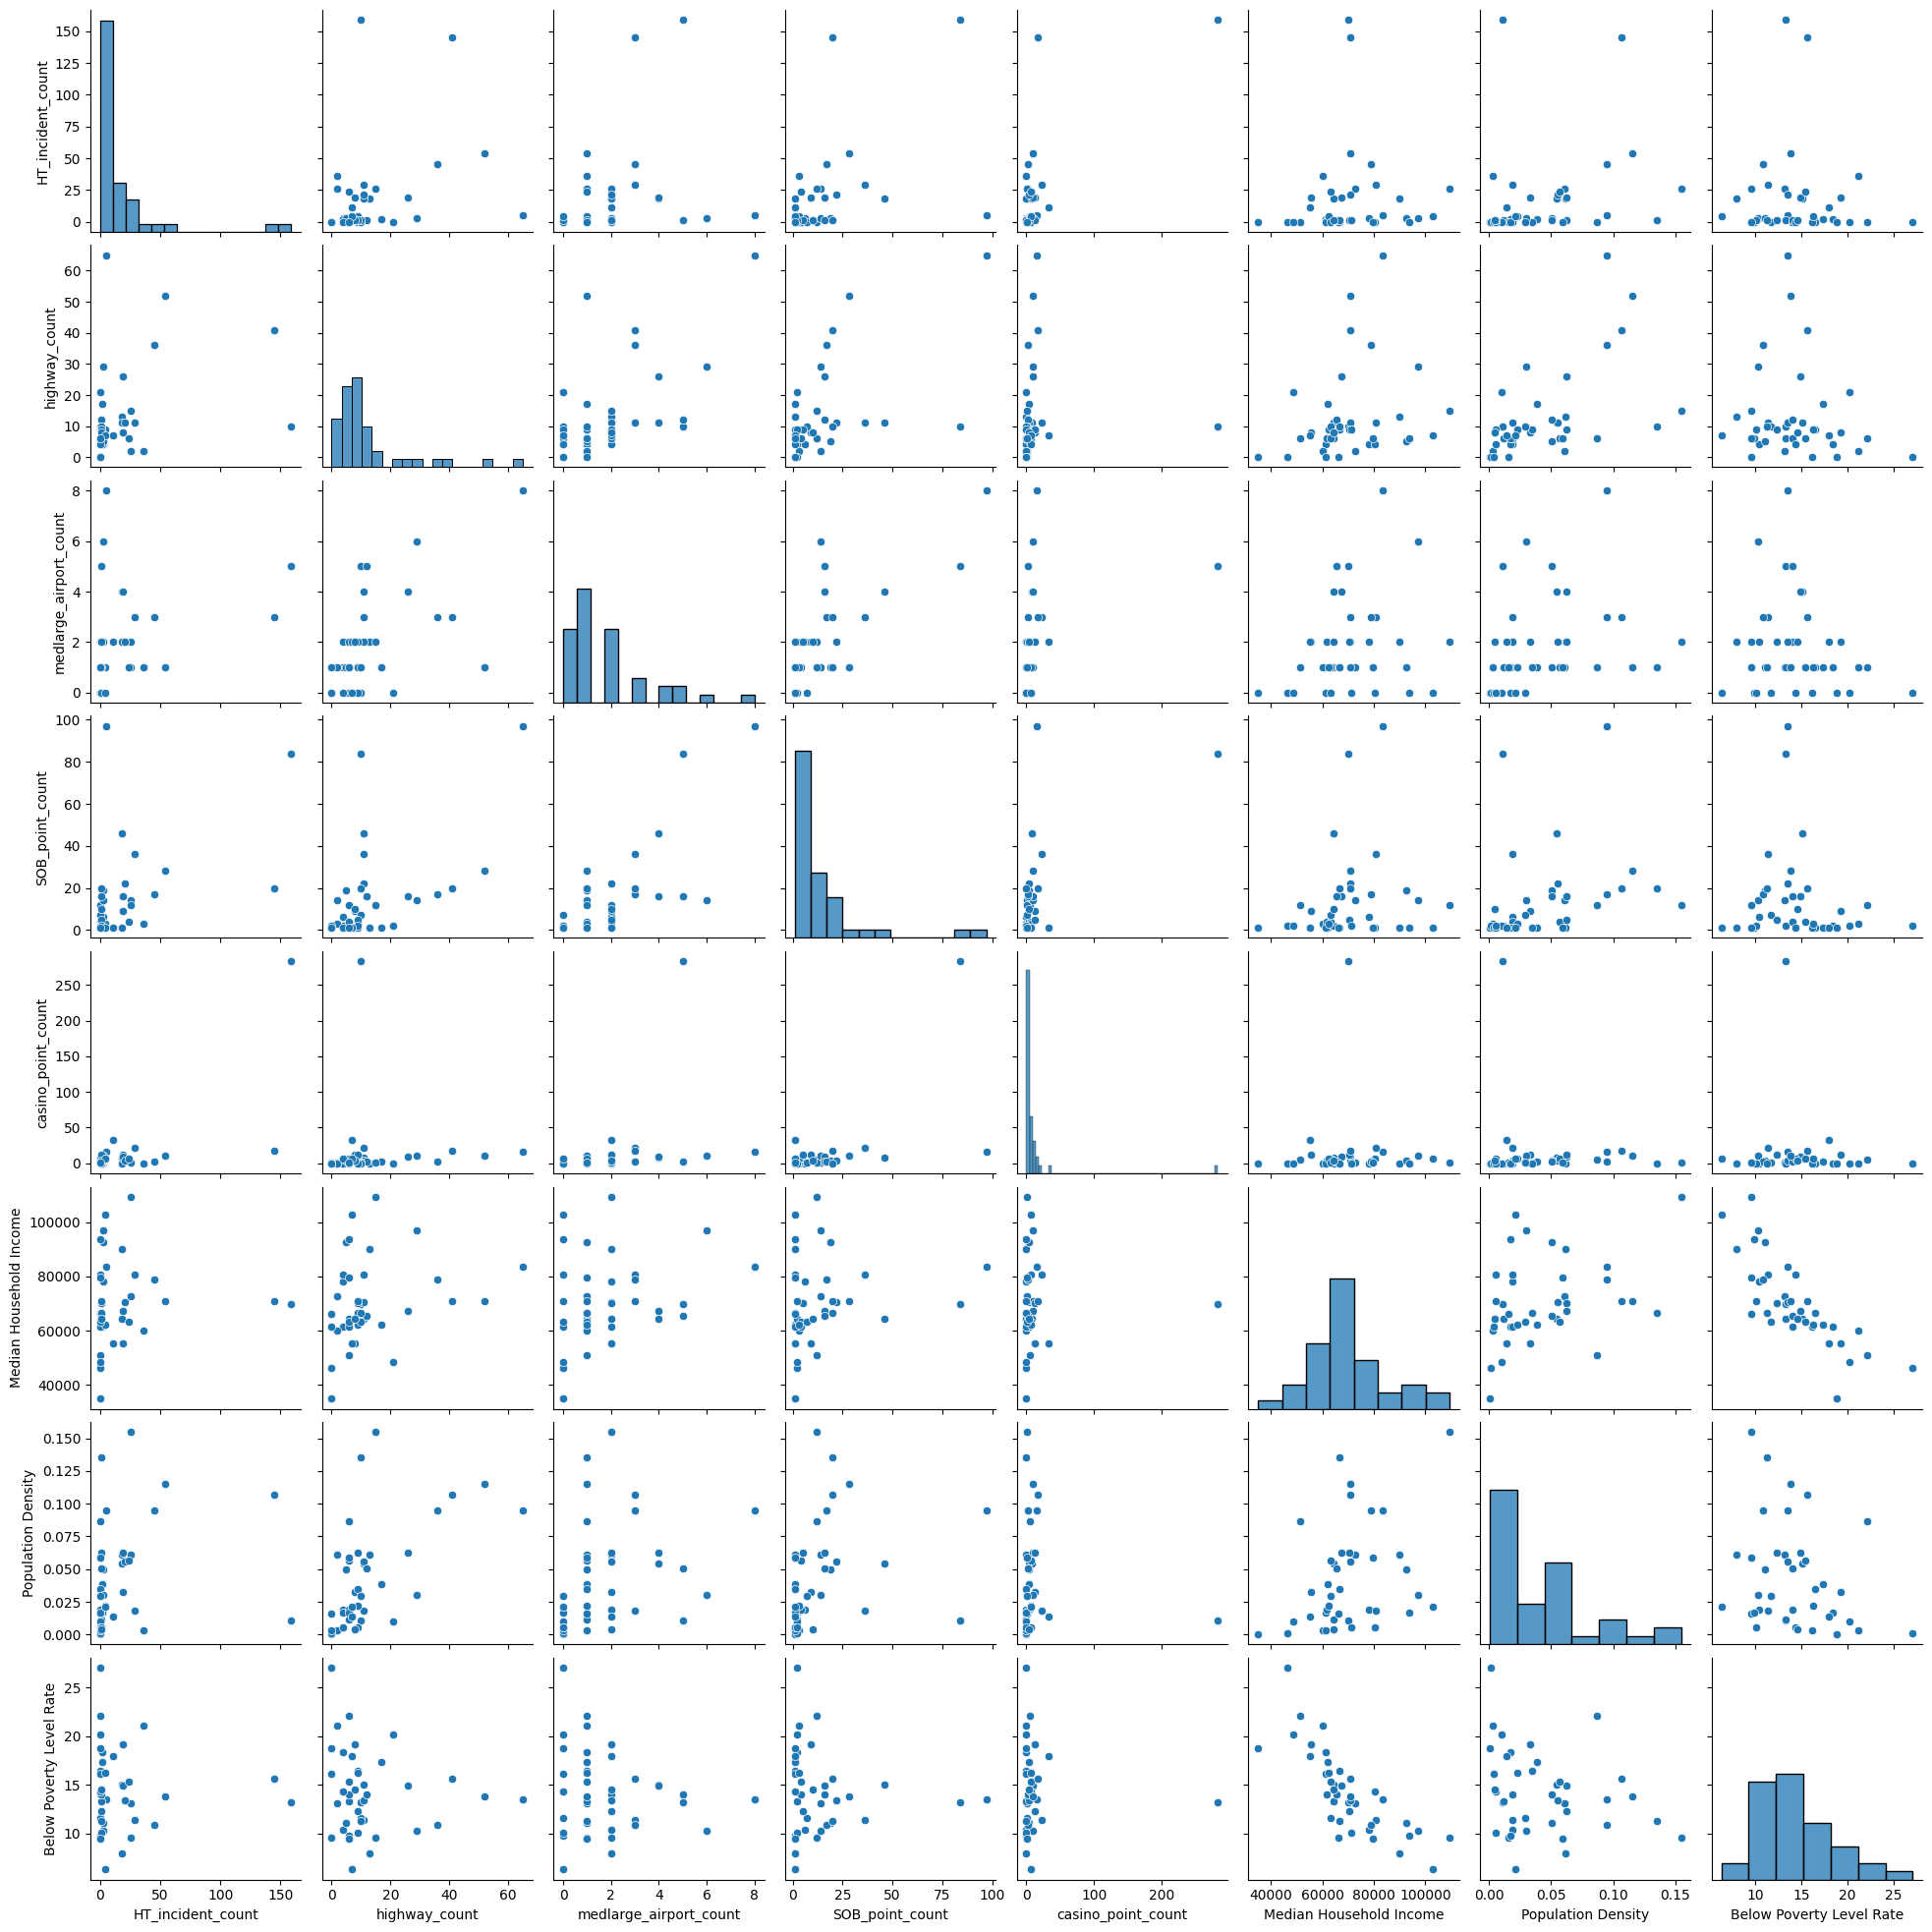

In [6]:
#first attempted pearson correlation matrices on original dataset (29 counties)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'pca' is your DataFrame containing the columns of interest
columns_of_interest = ['HT_incident_count', 'highway_count', 
                       'medlarge_airport_count', 'SOB_point_count', 
                       'casino_point_count', 'Median Household Income', 
                       'Population Density', 'Below Poverty Level Rate']

# Subset your DataFrame 'pca' to include only the columns of interest
subset_pca = pca[columns_of_interest]

# Pairwise plot using seaborn
sns.pairplot(subset_pca)
plt.show()


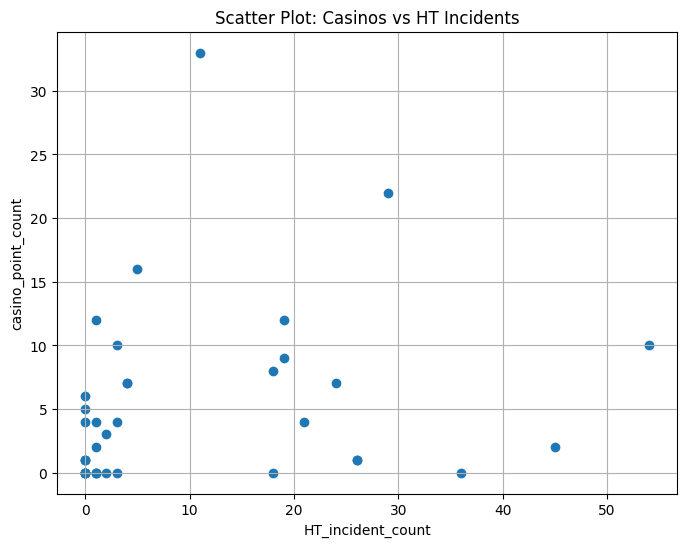

In [10]:
#scatterplot for casinos against human trafficking incidents
# Filter out rows where 'County_State' is 'Los Angeles, CA'
casino_ht = pca[pca['HT_incident_count'] < 100]
# casino_ht
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(casino_ht['HT_incident_count'], casino_ht['casino_point_count'])
plt.title('Scatter Plot: Casinos vs HT Incidents')
plt.xlabel('HT_incident_count')
plt.ylabel('casino_point_count')
plt.grid(True)
plt.show()

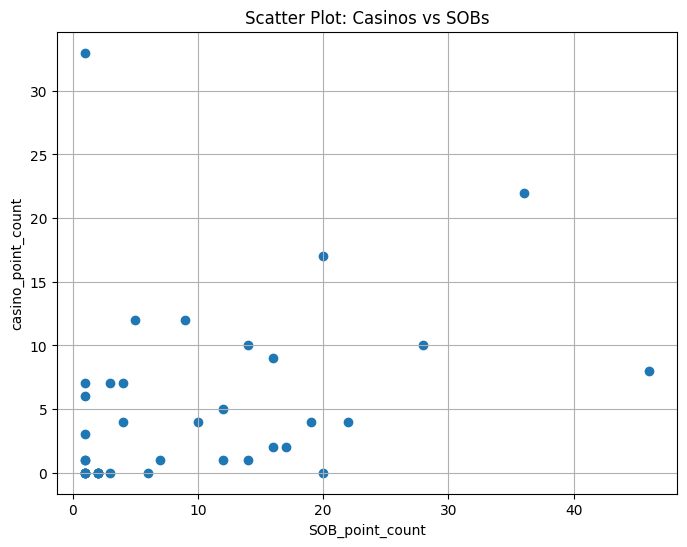

In [11]:
# casinos against SOB frequency by county
Filter out rows where 'County_State' is 'Los Angeles, CA'
casino_sob = pca[pca['SOB_point_count'] < 80]
#casino_ht
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(casino_sob['SOB_point_count'], casino_sob['casino_point_count'])
plt.title('Scatter Plot: Casinos vs SOBs')
plt.xlabel('SOB_point_count')
plt.ylabel('casino_point_count')
plt.grid(True)
plt.show()

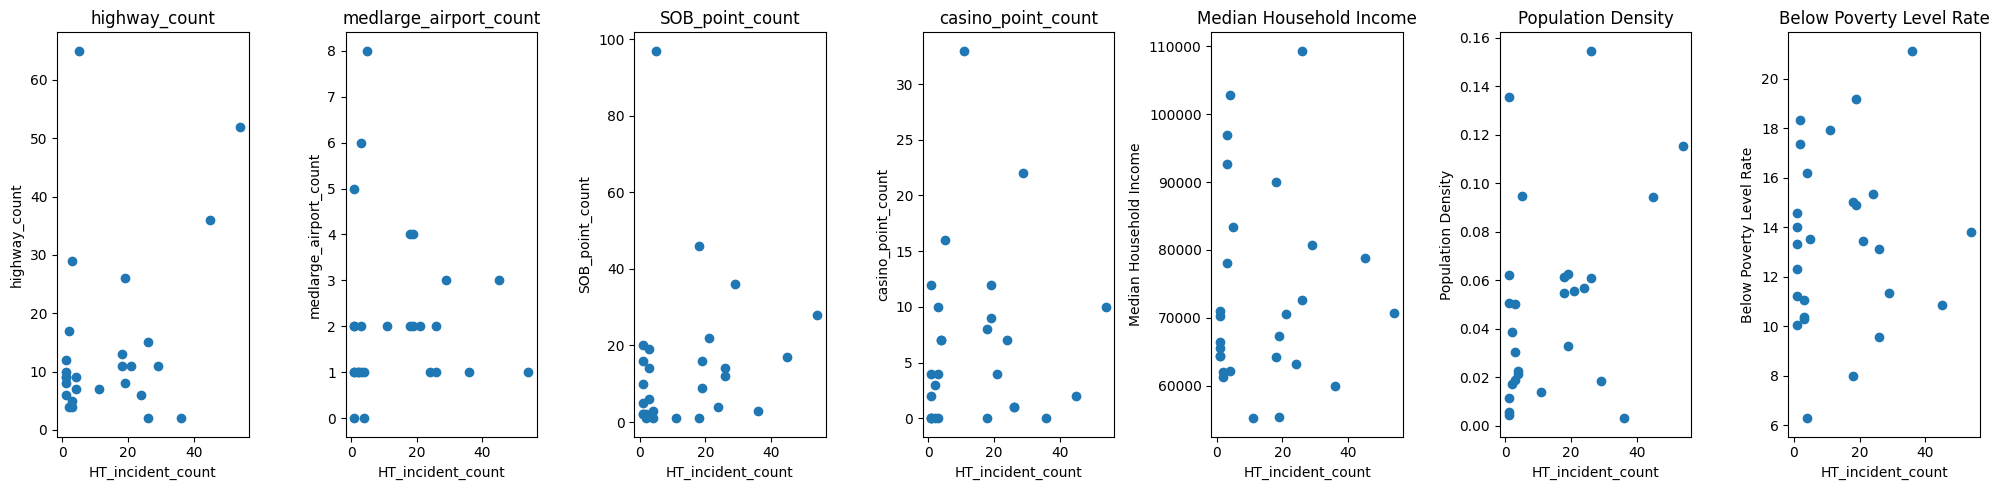

In [12]:
#-----------------scatterplots of HT incidents against all other data------------------
#removing major outliers
filtered_df = pca[(pca['HT_incident_count'] <= 100) & (pca['HT_incident_count'] != 0)]

# Fixed variable for comparison
fixed_variable = 'HT_incident_count'

# List of variables to plot against the fixed variable
variables = ['highway_count', 
                       'medlarge_airport_count', 'SOB_point_count', 
                       'casino_point_count', 'Median Household Income', 
                       'Population Density', 'Below Poverty Level Rate']

# Create a figure with 1 row and 7 columns
fig, axs = plt.subplots(1, len(variables), figsize=(20, 5))

# Iterate through each variable and create a scatter plot
for i, var in enumerate(variables):
    axs[i].scatter(filtered_df[fixed_variable], filtered_df[var])
    axs[i].set_title(f'{var}')
    axs[i].set_xlabel(fixed_variable)
    axs[i].set_ylabel(var)

# Adjust layout
plt.tight_layout()
plt.show()

#next steps: remove points with 0 human trafficking incidents

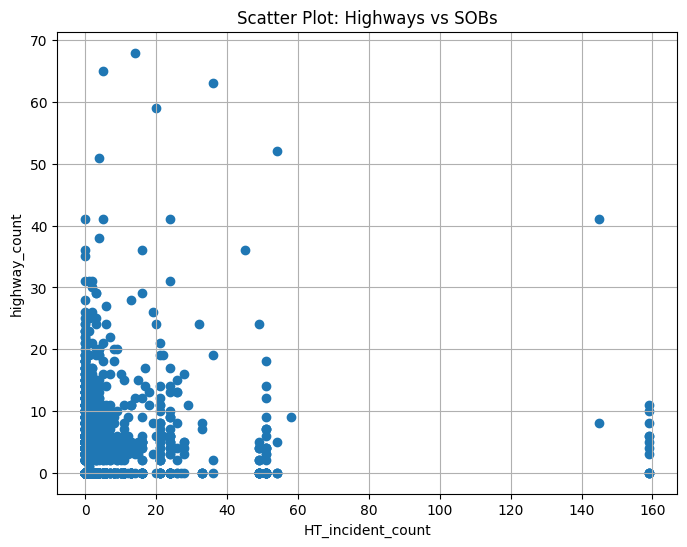

In [14]:
# Scatter plot of number of highways against number of sobs by county
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['HT_incident_count'], merged_df['highway_count'])
plt.title('Scatter Plot: Highways vs SOBs')
plt.xlabel('HT_incident_count')
plt.ylabel('highway_count')
plt.grid(True)
plt.show()


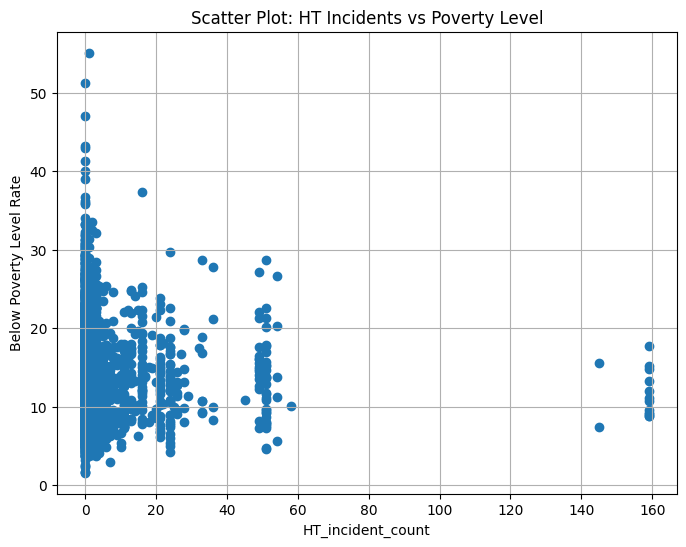

In [15]:
# Scatter plot of HT incident by county versus povery level (not normalized for population)
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['HT_incident_count'], merged_df['Below Poverty Level Rate'])
plt.title('Scatter Plot: HT Incidents vs Poverty Level')
plt.xlabel('HT_incident_count')
plt.ylabel('Below Poverty Level Rate')
plt.grid(True)
plt.show()